In [17]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement python==3.10 (from versions: none)
ERROR: No matching distribution found for python==3.10


In [2]:
import os
os.environ['OPENAI_API_KEY']=OPENAI_API_KEY

In [13]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("langchain-stock")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchain-stock


### RAG

In [3]:
import urllib.request
from langchain.vectorstores import Chroma
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFLoader


urllib.request.urlretrieve("https://github.com/chatgpt-kr/openai-api-tutorial/raw/main/ch07/2020_%EA%B2%BD%EC%A0%9C%EA%B8%88%EC%9C%B5%EC%9A%A9%EC%96%B4%20700%EC%84%A0_%EA%B2%8C%EC%8B%9C.pdf", filename="2020_경제금융용어 700선_게시.pdf")
loader = PyPDFLoader("./2020_경제금융용어 700선_게시.pdf")
texts = loader.load_and_split()

In [4]:
print(texts[13].page_content)
print(texts[-2].page_content)

1
ㄱ 
ㄱ
가계부실위험지수(HDRI)
가구의 소득 흐름은 물론 금융 및 실물 자산까지 종합적으로 고려하여 가계부채의 
부실위험을 평가하는 지표로, 가계의 채무상환능력을 소득 측면에서 평가하는 원리금상
환비율(DSR; Debt Service Ratio)과 자산 측면에서 평가하는 부채/자산비율(DTA; Debt 
To Asset Ratio)을 결합하여 산출한 지수이다. 가계부실위험지수는 가구의 DSR과 DTA가 
각각 40%, 100%일 때 100의 값을 갖도록 설정되어 있으며, 동 지수가 100을 초과하는 
가구를 ‘위험가구’로 분류한다. 위험가구는 소득 및 자산 측면에서 모두 취약한 ‘고위험가구’, 
자산 측면에서 취약한 ‘고DTA가구’, 소득 측면에서 취약한 ‘고DSR가구’로 구분할 수 있다. 
다만 위험 및 고위험 가구는 가구의 채무상환능력 취약성 정도를 평가하기 위한 것이며 
이들 가구가 당장 채무상환 불이행, 즉 임계상황에 직면한 것을 의미하지 않는다 .
 연관검색어 : 총부채원리금상환비율(DSR)
가계수지
가정에서 일정 기간의 수입(명목소득)과 지출을 비교해서 남았는지 모자랐는지를 
표시한 것을 가계수지(household's total income and expenditure)라 한다. 가계수지가 
가계수지 ∙
352
경제금융용어 700선
와 관련된 다양한 부수업무를 하는 회사를 말한다. 가령 신용카드 거래가 발생하면 
VAN사업자는 거래 승인을 위해 신용카드사에 거래내역을 전송하고 승인 및 조회결과를 
수신한 후 이를 가맹점에 전송한다. 또한 VAN사업자는 가맹점이 신용카드사에 전표를 
제출하여 대금을 청구하는 업무를 대신하기 위하여 가맹점을 방문하여 전표실물을 수거
하거나 전표 데이터를 수집한다 . 
 연관검색어 : 지급결제시스템, 전자금융
VaR(Value at Risk) 
주어진 신뢰수준 하에서 일정 기간 동안 발생할 수 있는 ‘최대 손실금액’으로 금융기관
의 잠재적인 손실을 측정하는 지표이다. 예를 들어 목표기간 1년, 신뢰수준 95% 에서

In [4]:
#문서에서 13번째 부터 용어 설명 시작, 마지막은 출처이기 때문에 생략
texts=texts[13:-1]
len(texts)

352

In [5]:
embedding=OpenAIEmbeddings()

vectordb=Chroma.from_documents(
    documents=texts,
    embedding=embedding
)

In [6]:
vectordb._collection.count()

352

### 뉴스 감성분석을 이용한 딥러닝 기반 주가 예측

2025-02-02 12:21:38,922 - INFO - 프로세스 시작
2025-02-02 12:21:38,922 - INFO - ====== WebDriver manager ======
2025-02-02 12:21:39,935 - INFO - Get LATEST chromedriver version for google-chrome
2025-02-02 12:21:40,085 - INFO - Get LATEST chromedriver version for google-chrome
2025-02-02 12:21:40,121 - INFO - Driver [C:\Users\yesthan\.wdm\drivers\chromedriver\win64\132.0.6834.159\chromedriver.exe] found in cache
2025-02-02 12:21:43,275 - INFO - 뉴스 크롤링 시작: https://m.stock.naver.com/worldstock/stock/AAPL.O/worldNews
2025-02-02 12:21:43,287 - INFO - 현재 뉴스 개수: 20
2025-02-02 12:21:43,322 - INFO - 새 날짜 감지: 2025-02-01
2025-02-02 12:21:43,329 - INFO - 2025-02-01에 뉴스 추가 (총 1개)
2025-02-02 12:21:43,390 - INFO - 2025-02-01에 뉴스 추가 (총 2개)
2025-02-02 12:21:43,448 - INFO - 2025-02-01에 뉴스 추가 (총 3개)
2025-02-02 12:21:43,489 - INFO - 2025-02-01에 뉴스 추가 (총 4개)
2025-02-02 12:21:43,539 - INFO - 2025-02-01에 뉴스 추가 (총 5개)
2025-02-02 12:21:43,629 - INFO - 2025-02-01에 뉴스 추가 (총 6개)
2025-02-02 12:21:43,670 - INFO - 2025-0

Epoch 1/50


c:\Users\yesthan\anaconda3\envs\project1-1\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\yesthan\anaconda3\envs\project1-1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3609
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1695 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 
Epoch 16/50
16/1

2025-02-02 14:16:26,013 - INFO - LSTM 모델 - MAE: 19929.9684, RMSE: 20008.6518, MAPE: 0.9888, R2: -128.0223, EV: -0.0128, MSLE: 20.3115
2025-02-02 14:16:26,014 - INFO - ResNet 모델 - MAE: 19930.1527, RMSE: 20008.8956, MAPE: 0.9889, R2: -128.0254, EV: -0.0135, MSLE: 20.3214


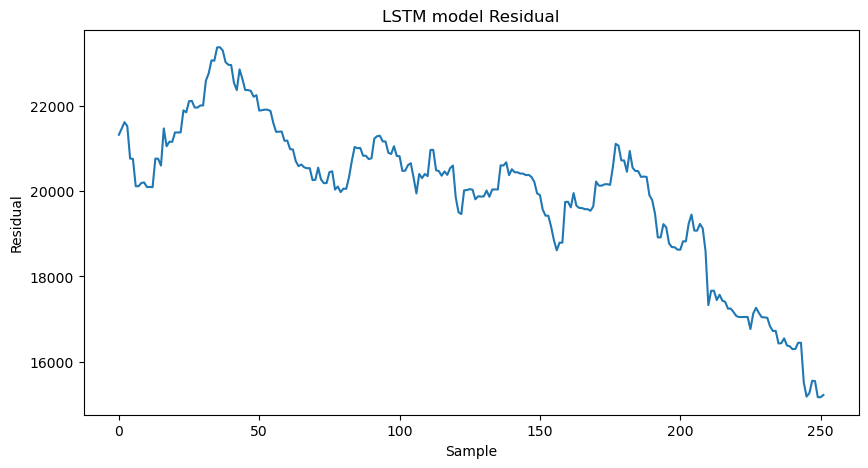

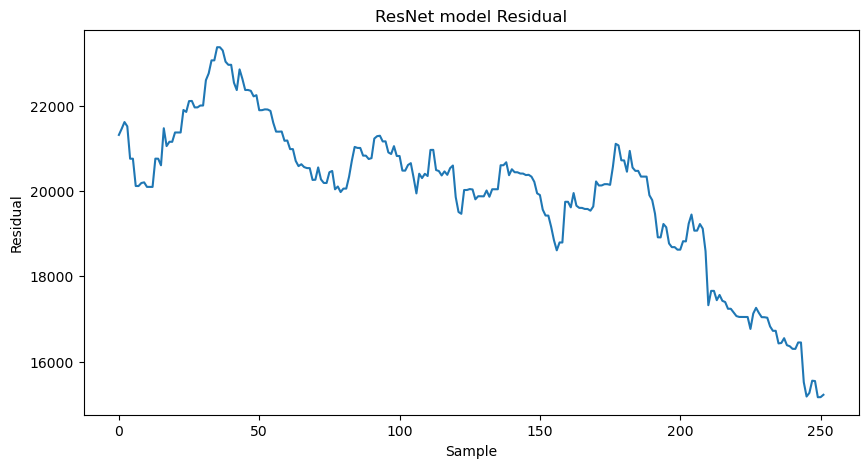

2025-02-02 14:16:26,215 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
2025-02-02 14:16:26,278 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
2025-02-02 14:16:26,307 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
2025-02-02 14:16:26,328 - WARNING - You are savin

In [8]:
import re
import datetime
import time
import logging
import json
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
from transformers import pipeline
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (mean_absolute_percentage_error, r2_score, 
                             explained_variance_score, mean_squared_log_error,
                             mean_absolute_error, mean_squared_error)
import matplotlib.pyplot as plt

# 로깅 설정
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")


class NaverStockNewsCollector:
    """네이버 증권에서 날짜별 뉴스 헤드라인(최대 10개씩) 크롤링"""

    def __init__(self):
        service = Service(ChromeDriverManager().install())
        self.driver = webdriver.Chrome(service=service)
        self.collected_data = {}  # {날짜: [헤드라인1, 헤드라인2, ...]} 형태로 저장

    def parse_date(self, date_text):
        """네이버 증권 뉴스 날짜 변환 (출처 제거 및 오전/오후 처리)"""
        try:
            date_text = date_text.strip()
            if not date_text:
                return None

            today = datetime.date.today()
            # "오전", "오후"가 포함된 경우 오늘 날짜로 처리
            if "오전" in date_text or "오후" in date_text:
                return today

            # YYYY.MM.DD 형식의 날짜만 추출
            match = re.search(r"\d{4}\.\d{2}\.\d{2}", date_text)
            if match:
                cleaned_date = match.group()
                return datetime.datetime.strptime(cleaned_date, "%Y.%m.%d").date()

            return None  # 변환 실패 시 None 반환
        except Exception as e:
            logging.error(f"날짜 변환 실패: '{date_text}' → 오류: {e}")
            return None

    def get_news(self, ticker, start_date, end_date):
        """
        네이버 증권 뉴스 크롤링  
        - 최신부터 시작하여, 각 날짜별로 최대 10개의 뉴스 헤드라인을 수집  
        - 종료 날짜(end_date)의 뉴스가 10개 이상 모일 때까지 "더보기" 버튼을 반복 클릭
        """
        naver_ticker = f"{ticker}.O"
        base_url = f"https://m.stock.naver.com/worldstock/stock/{naver_ticker}/worldNews"
        self.driver.get(base_url)
        time.sleep(1)

        logging.info(f"뉴스 크롤링 시작: {base_url}")

        start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d").date()
        end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d").date()

        while True:
            try:
                # 페이지 내 뉴스 항목들 가져오기
                news_items = self.driver.find_elements(By.XPATH, '//*[@id="stockContentWrapper"]/div[9]/ul/li')
                total_news = len(news_items)
                logging.info(f"현재 뉴스 개수: {total_news}")

                for i in range(1, total_news + 1):
                    try:
                        title_xpath = f'//*[@id="stockContentWrapper"]/div[9]/ul/li[{i}]/div/a/span/p[1]'
                        date_xpath = f'//*[@id="stockContentWrapper"]/div[9]/ul/li[{i}]/div/a/span/span'

                        title_element = self.driver.find_element(By.XPATH, title_xpath)
                        date_element = self.driver.find_element(By.XPATH, date_xpath)

                        title = title_element.text.strip()
                        news_date_text = date_element.text.strip()
                        news_date = self.parse_date(news_date_text)
                        if news_date is None:
                            continue

                        # 크롤링 범위: start_dt(최근)부터 end_dt(과거)까지
                        if news_date > start_dt or news_date < end_dt:
                            continue

                        # 날짜별 뉴스 리스트 초기화
                        if news_date not in self.collected_data:
                            self.collected_data[news_date] = []
                            logging.info(f"새 날짜 감지: {news_date}")

                        # 해당 날짜의 뉴스가 10개 미만인 경우에만 추가
                        if len(self.collected_data[news_date]) < 10:
                            if title not in self.collected_data[news_date]:
                                self.collected_data[news_date].append(title)
                                logging.info(f"{news_date}에 뉴스 추가 (총 {len(self.collected_data[news_date])}개)")
                    except Exception as e:
                        logging.error(f"뉴스 항목 처리 중 오류 발생: {e}")

                # 종료 날짜(end_dt)에 해당하는 뉴스가 10개 이상이면 크롤링 종료
                if len(self.collected_data.get(end_dt, [])) >= 10:
                    logging.info(f"종료 날짜 {end_dt}의 뉴스가 10개 이상 수집되어 크롤링 종료")
                    return self.collected_data

                # "더보기" 버튼을 클릭하여 추가 뉴스 로드
                try:
                    more_button = self.driver.find_element(By.XPATH, '//*[@id="stockContentWrapper"]/div[10]')
                    more_button.click()
                    logging.info("더보기 버튼 클릭 완료.")
                    time.sleep(3)
                except Exception as e:
                    logging.info(f"더보기 버튼을 찾거나 클릭하는데 실패: {e}")
                    break

            except Exception as e:
                logging.error(f"뉴스 크롤링 실패: {e}")
                break

        return self.collected_data

    def close(self):
        """WebDriver 종료"""
        self.driver.quit()


class TextSummarizer:
    """
    네이버 증권 뉴스 헤드라인 요약  
    - 각 날짜별로 수집된 뉴스 헤드라인 리스트를 전달받아 요약문을 생성합니다.
    """
    def __init__(self):
        self.summarizer = pipeline("summarization", model="noahkim/KoT5_news_summarization")

    def summarize(self, news_list):
        """
        뉴스 헤드라인 리스트(news_list)를 하나의 문자열로 결합하여 요약  
        (각 날짜별 뉴스 헤드라인을 모두 반영한 요약문 생성)
        """
        combined_text = " ".join(news_list)
        summary = self.summarizer(combined_text, max_length=50, min_length=10, do_sample=False)
        return summary[0]["summary_text"]


class SentimentAnalyzer:
    """감성 분석 (Hugging Face 모델 사용)"""
    def __init__(self):
        self.sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

    def analyze_sentiment(self, text):
        result = self.sentiment_pipeline(text)
        label = result[0]['label']
        try:
            star_score = int(label.split()[0])
        except Exception as e:
            star_score = 3
        normalized_score = star_score / 5.0
        return normalized_score


class StockPriceFetcher:
    """야후파이낸스를 사용해 주가 데이터를 가져옴"""
    def get_stock_data(self, ticker, start_date, end_date):
        stock = yf.Ticker(ticker)
        history = stock.history(start=start_date, end=end_date)
        return history["Close"]


class DataIntegrator:
    """뉴스 감성 데이터와 주가 데이터를 결합"""
    def integrate_data(self, stock_prices, sentiment_data):
        # 주가 데이터 인덱스를 DateTime 형식으로 변환 후 정렬
        stock_prices.index = pd.to_datetime(stock_prices.index)
        stock_prices = stock_prices.sort_index()

        logging.info("감성 분석 데이터 타입: %s", type(sentiment_data))
        logging.info("감성 분석 데이터 샘플 (5개): %s", sentiment_data[:5])

        if isinstance(sentiment_data, list):
            if isinstance(sentiment_data[0], tuple) and len(sentiment_data[0]) == 2:
                sentiment_df = pd.DataFrame(sentiment_data, columns=["Date", "Sentiment"])
            else:
                raise ValueError("sentiment_data의 구조가 잘못되었습니다. (List of (Date, Score) Tuples)")
        else:
            raise ValueError("sentiment_data는 리스트 형식이어야 합니다.")

        sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"])
        sentiment_df.set_index("Date", inplace=True)
        sentiment_df.sort_index(inplace=True)
        logging.info("감성 분석 데이터 DataFrame 생성 완료:\n%s", sentiment_df.head())

        merged_data = pd.merge_asof(sentiment_df, stock_prices.to_frame(), left_index=True, right_index=True, direction="backward")
        merged_data.fillna(method="ffill", inplace=True)
        logging.info("최종 병합된 데이터 (공휴일 처리 완료):\n%s", merged_data.head())

        scaler = MinMaxScaler(feature_range=(0, 1))
        price_scaled = scaler.fit_transform(merged_data.iloc[:, 1].values.reshape(-1, 1))
        sentiment_scores = merged_data["Sentiment"].values.reshape(-1, 1)
        integrated_data = np.hstack((price_scaled, sentiment_scores))
        return integrated_data, scaler


class StockPredictor:
    """LSTM 및 ResNet 기반 주가 예측 모델"""
    def build_lstm_model(self, input_shape):
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(50, return_sequences=True),
            Dropout(0.2),
            LSTM(50),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer="adam", loss="mean_squared_error")
        return model

    def build_resnet_model(self, input_shape):
        model = Sequential([
            Conv1D(64, kernel_size=1, activation="relu", input_shape=input_shape),
            MaxPooling1D(pool_size=1),
            Conv1D(128, kernel_size=1, activation="relu"),
            MaxPooling1D(pool_size=1),
            Flatten(),
            Dense(50, activation="relu"),
            Dense(1)
        ])
        model.compile(optimizer="adam", loss="mean_squared_error")
        return model

    def evaluate_model(self, true_values, predicted_values):
        mae = mean_absolute_error(true_values, predicted_values)
        rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
        return mae, rmse


def main():
    ticker = "AAPL"
    # 최신 뉴스(어제)부터 1년 전까지 크롤링 (end_date가 과거일수록 오래된 데이터)
    today = (datetime.date.today() - datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    end_date = (datetime.date.today() - datetime.timedelta(days=366)).strftime("%Y-%m-%d")

    logging.info("프로세스 시작")

    # 뉴스 크롤링
    collector = NaverStockNewsCollector()
    news_data = collector.get_news(ticker, today, end_date)
    collector.close()
    
    news_data_str = {str(k): v for k, v in news_data.items()}


    # 크롤링이 끝난 직후 뉴스 데이터를 파일로 저장 (JSON 형식)
    with open("news_data.json", "w", encoding="utf-8") as f:
        json.dump(news_data_str, f, ensure_ascii=False, indent=2)
    logging.info("뉴스 데이터가 news_data.json 파일로 저장되었습니다.")

    summarizer = TextSummarizer()
    analyzer = SentimentAnalyzer()
    stock_fetcher = StockPriceFetcher()

    # 각 날짜별로 수집된 뉴스 헤드라인을 요약하고 감성 분석 진행
    sentiment_scores = []
    for date, news_list in news_data.items():
        summary = summarizer.summarize(news_list)
        sentiment_score = analyzer.analyze_sentiment(summary)
        sentiment_scores.append((date, sentiment_score))
        logging.info(f"{date}의 요약문: {summary}")
        logging.info(f"{date}의 감성 점수: {sentiment_score}")

    # 주가 데이터 가져오기
    stock_prices = stock_fetcher.get_stock_data(ticker, end_date, today)

    # 뉴스 감성 데이터와 주가 데이터 결합
    integrator = DataIntegrator()
    stock_prices.index = stock_prices.index.tz_localize(None)
    dates = pd.to_datetime([date for date, _ in sentiment_scores])
    # reindex 시 stock_prices_filtered는 크롤링된 날짜 기준으로 정렬됨
    stock_prices_filtered = stock_prices.reindex(dates, method="nearest")
    integrated_data, scaler = integrator.integrate_data(
        stock_prices_filtered,
        sentiment_scores
    )

    # 모델 학습 및 예측
    predictor = StockPredictor()
    lstm_model = predictor.build_lstm_model((integrated_data.shape[1], 1))
    resnet_model = predictor.build_resnet_model((integrated_data.shape[1], 1))
    X, y = integrated_data[:-1], integrated_data[1:, 0]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    lstm_model.fit(X, y, epochs=50, batch_size=16, verbose=1)
    resnet_model.fit(X, y, epochs=50, batch_size=16, verbose=1)

    lstm_predicted = lstm_model.predict(X)
    resnet_predicted = resnet_model.predict(X)

    lstm_predicted_price = scaler.inverse_transform(lstm_predicted)
    resnet_predicted_price = scaler.inverse_transform(resnet_predicted)

    # 실제 주가 데이터는 integrated_data와 동일한 기간을 반영하므로
    # stock_prices_filtered에서 마지막 X의 샘플 수 만큼 슬라이싱
    num_samples = X.shape[0]
    true_prices = scaler.inverse_transform(stock_prices_filtered.values.reshape(-1, 1))[-(num_samples+1):][1:]

    # 평가 지표 계산
    lstm_mae, lstm_rmse = predictor.evaluate_model(true_prices, lstm_predicted_price)
    resnet_mae, resnet_rmse = predictor.evaluate_model(true_prices, resnet_predicted_price)
    lstm_mape = mean_absolute_percentage_error(true_prices, lstm_predicted_price)
    resnet_mape = mean_absolute_percentage_error(true_prices, resnet_predicted_price)
    lstm_r2 = r2_score(true_prices, lstm_predicted_price)
    resnet_r2 = r2_score(true_prices, resnet_predicted_price)

    lstm_ev = explained_variance_score(true_prices, lstm_predicted_price)
    resnet_ev = explained_variance_score(true_prices, resnet_predicted_price)
    lstm_msle = mean_squared_log_error(true_prices, lstm_predicted_price)
    resnet_msle = mean_squared_log_error(true_prices, resnet_predicted_price)

    logging.info(f"LSTM 모델 - MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}, MAPE: {lstm_mape:.4f}, R2: {lstm_r2:.4f}, EV: {lstm_ev:.4f}, MSLE: {lstm_msle:.4f}")
    logging.info(f"ResNet 모델 - MAE: {resnet_mae:.4f}, RMSE: {resnet_rmse:.4f}, MAPE: {resnet_mape:.4f}, R2: {resnet_r2:.4f}, EV: {resnet_ev:.4f}, MSLE: {resnet_msle:.4f}")

    # 잔차 분석 (Residual Analysis)
    residuals_lstm = true_prices - lstm_predicted_price
    plt.figure(figsize=(10,5))
    plt.plot(residuals_lstm)
    plt.title("LSTM model Residual")
    plt.xlabel("Sample")
    plt.ylabel("Residual")
    plt.show()

    residuals_resnet = true_prices - resnet_predicted_price
    plt.figure(figsize=(10,5))
    plt.plot(residuals_resnet)
    plt.title("ResNet model Residual")
    plt.xlabel("Sample")
    plt.ylabel("Residual")
    plt.show()

    # 모델 저장 (여기서는 크롤링 종료 후 바로 저장하는 방식으로 변경)
    # 즉, 학습 전에 모델을 저장하지 않고, 학습 완료 후 모델 저장 대신 뉴스 데이터 저장은 이미 진행됨.
    lstm_model.save("lstm_stock_model.h5")
    resnet_model.save("resnet_stock_model.h5")
    lstm_model.save("lstm_stock_model_saved.h5")   # SavedModel 형식
    resnet_model.save("resnet_stock_model_saved.h5")
    logging.info("모델 저장 완료: lstm_stock_model.h5, resnet_stock_model.h5 및 SavedModel 포맷")


if __name__ == "__main__":
    main()


In [9]:
import torch
torch.cuda.empty_cache()

### 챗봇

In [38]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
from langchain.agents import Tool
from langchain.tools import tool
from langchain.memory import ConversationBufferWindowMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain_huggingface import HuggingFacePipeline
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from difflib import get_close_matches


class NewsCollector:
    @tool("get_latest_news")
    def get_latest_news(self) -> list:
        """야후 파이낸스에서 최신 뉴스를 가져옵니다."""
        try:
            response = requests.get(
                "https://finance.yahoo.com/news",
                headers={'User-Agent': 'Mozilla/5.0'}
            )
            new_items=[]
            soup = BeautifulSoup(response.text, 'html.parser')
            articles1 = soup.find_all('h3', class_='clamp tw-line-clamp-3 sm:tw-line-clamp-2 yf-18q3fnf')
            articles2 = soup.find_all('h2',class_= 'tw-line-clamp-3 yf-16ne7ux')
            articles = articles1+articles2
            for article in articles:
                new_items.append(article.text)

            return new_items
        except Exception as e:
            return f"뉴스 수집 실패: {str(e)}"
class CommentCollector:
    """Yahoo Finance 뉴스 댓글 수집"""
    def get_comments(self, news_url):
        try:
            response = requests.get(news_url, headers={'User-Agent': 'Mozilla/5.0'})
            soup = BeautifulSoup(response.text, 'html.parser')
            comments = soup.find_all('span', class_='comment-text')
            
            return [comment.text for comment in comments[:10]]  # 상위 10개 댓글
        except Exception as e:
            print("댓글 가져오기 실패:", str(e))
            return []

class SentimentAnalyzer:
    def __init__(self):
        self.sentiment_model=pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english")
        
    def analyze_sentiment(self, text_list):
        """뉴스, 댓글 텍스트에 감성 분석 적용"""
        sentiments= self.sentiment_model(text_list)
        sentiment_scores= []
        for s in sentiments:
            label = s['label']
            score = s['score']
            
            if label == 'NEGATIVE':
                score = -score
            sentiment_scores.append(score)
        return sentiment_scores
    
    def calculate_sentiment_score(self,sentiment_scores):
        """뉴스와 댓글의 감성 점수 평균"""
        return sum(sentiment_scores) / len(sentiment_scores)

class Exchange:
    def __init__(self):
        self.base_url = "https://finance.naver.com/marketindex/"
    
    def get_usd_exchange_rate(self) -> dict:
        """네이버 증권에서 미국 USD 환율 정보를 가져옵니다."""
        try:
            response = requests.get(self.base_url, headers={"User-Agent": "Mozilla/5.0"})
            response.raise_for_status()  # 요청이 성공했는지 확인
            soup = BeautifulSoup(response.text, "html.parser")
            
            # 미국 USD 환율 데이터 가져오기
            usd_data = soup.select_one("div.market1 ul.data_lst li.on")
            if not usd_data:
                return {"error": "환율 정보를 가져올 수 없습니다."}
            
            # 필요한 데이터 추출
            value = usd_data.select_one("span.value").get_text(strip=True)  # 환율 값
            change = usd_data.select_one("span.change").get_text(strip=True)  # 변동 값
            blind = usd_data.select("span.blind")[2].get_text(strip=True)  # 설명 (상승/하락)
            
            return {"value": float(value.replace(",", "")), "change": float(change.replace(",", "")), "blind": blind}
        except Exception as e:
            return {"error": f"환율 정보를 가져오는 중 오류 발생: {str(e)}"}

            
        
        
class StockTools:
    def get_stock_price(self, tool_input: str) -> dict:
        """주식 심볼을 입력받아 현재 주가 정보를 반환합니다."""
        try:
            symbol = str(tool_input).strip().upper()
            stock = yf.Ticker(symbol)
            info = stock.info
            history = stock.history(period='1d')
            
            if history.empty:
                return {"error": f"데이터를 찾을 수 없습니다: {symbol}"}
                
            return info
        except Exception as e:
            return {"error": f"주가 조회 실패: {str(e)}"}

    def get_market_indices(self, tool_input: str = "") -> dict:
        """주요 시장 지수 정보를 반환합니다. 상승/하락 이유를 분석합니다."""
        indices = {'^GSPC': 'S&P 500', '^DJI': 'Dow Jones', '^IXIC': 'NASDAQ'}
        results = {}
        
        for symbol, name in indices.items():
            try:
                stock = yf.Ticker(symbol)
                history = stock.history(period='1d')
                if not history.empty:
                    close_price=history['Close'].iloc[-1]
                    open_price=history['Open'].iloc[0]
                    change=((close_price-open_price)/open_price)*100
                    results[name] = {
                        "price": close_price,
                        "change": change,
                        "trend":"상승" if change >=0 else "하락"
                    }
            except Exception:
                results[name] = {"error": "데이터 조회 실패"}
                
        return results


class FinancialAdvisor:
    def __init__(self):
        # 기본 LLM 설정
        self.gpt = ChatOpenAI(
            model_name="gpt-4", 
            temperature=0.7,
            api_key=OPENAI_API_KEY
            )
        # Bllossom 모델 설정
        self.setup_bllossom()
        
        # 도구 설정
        self.news_collector = NewsCollector()
        self.stock_tools = StockTools()
        
        # 메모리 설정
        self.memory = ConversationBufferWindowMemory(
            k=5,
            memory_key="chat_history",
            return_messages=True
        )
        self.terms_df=pd.read_excel('terms_data.xlsx')
        
        # 도구 목록 설정
        self.tools = [
            Tool(
                name="News",
                func=self.news_collector.get_latest_news,
                description="최신 금융 뉴스를 가져옵니다"
            ),
            Tool(
                name="StockPrice",
                func=self.stock_tools.get_stock_price,
                description="특정 주식의 현재 가격 정보를 가져옵니다"
            ),
            Tool(
                name="MarketIndices",
                func=self.stock_tools.get_market_indices,
                description="주요 시장 지수 정보를 가져옵니다"
            )
        ]
        
        # 체인 설정
        self.setup_chains()
        
        
    #양자화
    def setup_bllossom(self):
        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_compute_dtype=torch.float16,
            bnb_4bit_use_double_quant=True,
            llm_int8_enable_fp32_cpu_offload=True,
        )   # 양자화 유형
        model_id = 'MLP-KTLim/llama-3-Korean-Bllossom-8B'
        tokenizer = AutoTokenizer.from_pretrained(model_id)
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            device_map={"":0},
            quantization_config=bnb_config,
            pad_token_id=tokenizer.eos_token_id,
        )
        pipe = pipeline(
            "text-generation",
            model=model,
            tokenizer=tokenizer,
            max_new_tokens=200,
            do_sample=True,
            temperature=0.7,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id,
            
        )
        
        self.bllossom = HuggingFacePipeline(pipeline=pipe)

    def setup_chains(self):
        
        # 의도 분석 체인
        intent_prompt = PromptTemplate(
            input_variables=["query"],
            template="""다음 질문의 의도를 파악해서 가장 적절한 번호 하나만 알려주세요.

                        질문: {query}

                        1번: 주식이나 투자에 대한 일반적인 설명이 필요한 경우
                        2번: 특정 주식의 현재 가격을 알고 싶은 경우
                        3번: 전체 시장 상황이나 동향을 알고 싶은 경우
                        4번: 최신 뉴스나 소식을 알고 싶은 경우
                        5번: 환율 정보를 알고 싶은 경우

                        답변:"""
        )
        
        self.intent_chain = LLMChain(
            llm=self.bllossom,
            prompt=intent_prompt,
            memory=self.memory,
            verbose=True,
        )
  
        # 주식 분석 체인
        stock_prompt = PromptTemplate(
            input_variables=["stock_data","query"],
            template="""
            다음 주식 정보를 바탕으로 질문에 맞는 답변을 해주세요:{stock_data}
            
            질문:{query}
            답변:
            """
        )
        
        self.stock_chain = LLMChain(
            llm=self.bllossom,
            prompt=stock_prompt,
            memory=self.memory,
            verbose=True
        )
        
        # 시장 분석 체인
        market_prompt = PromptTemplate(
            input_variables=["indices", "news"],
            template="""
            다음 정보를 바탕으로 현재 시장 상황을 분석해서 한국말로 알려주세요:
            
            시장 지수:
            {indices}
            
            주요 뉴스:
            {news}
            """
        )
        
        self.market_chain = LLMChain(
            llm=self.gpt,
            prompt=market_prompt,
            memory=self.memory,
            verbose=True
        )
        
    def classify_intent(self, query: str) -> str:
        """사용자 입력의 의도를 분류합니다."""
        try:
            stock_keywords=[]
            # 용어 사전 정의
            stock_keywords=self.terms_df['용어'].tolist()+self.terms_df['연관어'].tolist()
                
             # 기본 키워드 정의
            keywords = {
                "1": ["설명", "뭔가요", "의미", "개념","뭐야","란?"]+stock_keywords,
                "2": ["주가", "얼마", "가격", "시세"],
                "3": ["시장", "동향", "상황", "지수", "추세"],
                "4": ["뉴스", "소식", "기사", "새로운"],
                "5": ["환율","원화","달러"]
            }

            
            query_lower = str(query).lower()
            for intent, word_list in keywords.items():
                word_list = [str(word) for word in word_list]
                if any(word in query_lower for word in word_list):
                    return intent
            
            # 키워드로 판단이 어려운 경우 Bllossom 모델 사용
            response = self.intent_chain.run(query)            
            
            # 응답에서 숫자만 추출
            import re
            numbers = re.findall(r'\d+', response)
            if numbers:
                intent = numbers[0]
                if intent in ["1", "2", "3", "4"]:
                    return intent
                    
            # 기본값 반환
            return "3"
            
        except Exception as e:
            print(f"의도 분류 중 오류 발생: {str(e)}")
            return "1"  # 오류 발생 시 기본값
    def find_term_in_excel(self,query:str) -> str:
        """Excel 파일에서 관련 용어를 찾아 설명을 반환합니다."""
        #쿼리에서 주요 키워드 추출
        stock_word=query.replace("이란?", "").replace("란?", "").replace("가 뭐야?", "").replace("이 뭐야?", "").strip()
        #용어 열,행에서 일치하는 항목 검색
        term_match=self.terms_df[self.terms_df['용어'].str.contains(stock_word,na=False)]
        related_match = self.terms_df[self.terms_df['연관어'].str.contains(stock_word, na=False)]
        #합치기
        self.matches = pd.concat([term_match, related_match]).drop_duplicates()
        self.matches=self.matches.drop_duplicates(keep='first')

        if not self.matches.empty:
            row=get_close_matches(stock_word,self.matches, n=1, cutoff=0.8)
            context=f"""
            용어:{row['용어']}
            연관어:{row['연관어']}
            설명:{row['설명']}
            """
            return context
        return None
    
    def process_query(self, query: str) -> str:
        try:
            # 의도 파악
            intent = self.classify_intent(query)
            
            if intent == "1":
                #용어검색
                retriever = vectordb.as_retriever(search_kwargs={"k": 2})
                term_info = retriever.get_relevant_documents(query)
                if term_info:
                    prompt = f"""
                    당신은 주식 초보에게 용어를 설명해주는 조수입니다. 검색 결과를 바탕으로 사용자에게 친근하게 답변해주세요:
                    {term_info}
                    질문:{query}
                    답변:"""
                    return self.bllossom(prompt)
                else:
                    return self.bllossom(query)
            
            elif intent == "2":
                # 주식 가격 조회
                symbol_prompt = PromptTemplate(
                    input_variables=["query"],
                    template="""사용자가 미국 주식과 관련된 질문을 합니다. 질문에서 미국 주식 심볼(티커)을 추출하세요. 
                                심볼은 대문자 영어로 구성된 1~5글자이며, 심볼만 반환하고 다른 설명은 포함하지 마세요. 
                                만약 질문에서 심볼을 추출할 수 없다면 미국 s&p500 심볼이라도 추출하세요.
                                질문: {query}
                                답변: 심볼(영어)
                                
                                """
                )
                symbol_chain = LLMChain(llm=self.gpt, prompt=symbol_prompt)
                symbol = symbol_chain.run(query).strip().upper()
                
                # Tool 실행 방식 수정
                stock_tool = [tool for tool in self.tools if tool.name == "StockPrice"][0]
                stock_data = stock_tool.run(symbol)
                
                return self.stock_chain.run(stock_data=stock_data)
            
            elif intent == "3":
                # 시장 동향 분석
                market_tool = [tool for tool in self.tools if tool.name == "MarketIndices"][0]
                indices = market_tool.run("")
                
                news_tool = [tool for tool in self.tools if tool.name == "News"][0]
                news = news_tool.run("")
                
                analysis_message=self.analyze_market(indices,news)
                
                return analysis_message
            
            elif intent == "4":
                # 뉴스 요약
                news_tool = [tool for tool in self.tools if tool.name == "News"][0]
                news = news_tool.run("")
                return self.gpt.predict(f"다음 뉴스를 한국말로 요약해주세요: {news}")
            
            elif intent == "5":
                # Exchange 클래스 인스턴스 생성
                exchange = Exchange()
                exchange_data = exchange.get_usd_exchange_rate()
                
                # 오류 처리
                if "error" in exchange_data:
                    return exchange_data["error"]
                
                # LLM Prompt 설정
                exchange_prompt = PromptTemplate(
                    input_variables=['query', 'value', 'change', 'blind'],
                    template="""
                    사용자가 환율에 대해 물어보면 현재 환율 정보를 출력해주세요.
                    만약 원화 또는 달러를 계산해달라고 요청하면 환율에 따라 결과를 계산해주세요.
                    질문{query}
                    
                    
                    현재 환율 정보:
                    - USD 환율: {value}원
                    - 변동: {change}원 ({blind})
                    """
                )
                
                # 환율 계산 체인 실행
                exchange_chain = LLMChain(llm=self.bllossom, prompt=exchange_prompt)
                response = exchange_chain.run(
                    query=query,
                    value=exchange_data["value"],
                    change=exchange_data["change"],
                    blind=exchange_data["blind"]
                )
                
                return response

            else:
                return "죄송합니다. 질문을 이해하지 못했습니다."
                
        except Exception as e:
            return f"오류가 발생했습니다: {str(e)}"
    
    def analyze_market(self,indeices:dict,news:list) ->str:
        """시장 지수와 뉴스를 바탕으로 상승/하락 이유를 분석합니다."""
        try:
            analysis =[]
            for index , data in indeices.items():
                trend=data.get("trend","정보없음")
                price=data.get("price","정보없음")
                change=data.get("change","정보없음")
                related_news = self.gpt.predict(f"다음 뉴스를 한국말로 요약해주세요:{news}")
                
                analysis.append(
                    f"{index}({trend}:현재 가격은 {price}, 변동률은 {change:.2f}%입니다.")
            analysis.append(related_news)
            return "\n\n".join(analysis)
        except Exception:
            return f"시장 분석 중 오류가 발생했습니다"
        

    def chat(self):
        print("금융 어시스턴트입니다. 종료하려면 'quit'를 입력하세요.")
        while True:
            query = input("질문: ")
            if query.lower() == 'quit':
                break
                
            response = self.process_query(query)
            print(f"답변: {response}")

if __name__ == "__main__":
    advisor = FinancialAdvisor()
    advisor.chat()


NameError: name 'OPENAI_API_KEY' is not defined